In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
merge_df = pd.read_csv('./merged.csv')
merge_df.drop(columns=['Unnamed: 0'], inplace=True)
merge_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_USE_MONTH,NOT_USED_MONTH,SCALED_SCORE,WINDOW
0,5008804,1,1,1,0,427500.0,4,1,0,4,...,1,1,0,0,17,2.0,15.0,1.0,5.800000,16
1,5008806,1,1,1,0,112500.0,4,4,1,1,...,1,0,0,0,16,2.0,14.0,16.0,5.500000,30
2,5008808,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,14,1.0,2.0,3.0,5.000000,5
3,5008812,0,0,1,0,283500.0,1,1,2,1,...,1,0,0,0,17,1.0,14.0,3.0,5.000000,17
4,5008815,1,1,1,0,270000.0,4,1,1,1,...,1,1,1,1,0,2.0,6.0,0.0,5.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,5148694,0,0,0,0,180000.0,1,4,0,2,...,1,0,0,0,8,2.0,21.0,0.0,4.809524,21
8872,5149055,0,0,1,0,112500.0,0,4,1,1,...,1,1,1,0,17,2.0,20.0,0.0,5.000000,20
8873,5149729,1,1,1,0,90000.0,4,4,1,1,...,1,0,0,0,17,2.0,17.0,5.0,4.882353,22
8874,5149838,0,0,1,0,157500.0,1,1,1,1,...,1,0,1,1,11,2.0,33.0,0.0,3.818182,33


In [5]:
from sklearn.model_selection import train_test_split

X = merge_df.drop(columns=['CREDIT_USE_MONTH', 'NOT_USED_MONTH', 'SCALED_SCORE', 'WINDOW'], axis=1)
y = merge_df['SCALED_SCORE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

0.4131520435246149

In [13]:
y_pred

array([5.34679837, 5.34065476, 5.32333389, ..., 5.32332903, 5.33264222,
       5.31133046])

In [11]:
y_test

283     5.892857
2818    5.000000
1290    4.950000
4780    6.000000
807     5.250000
          ...   
3667    5.666667
8828    4.181818
6619    5.877193
6358    5.936170
7754    5.000000
Name: SCALED_SCORE, Length: 1776, dtype: float64

In [15]:
import set_matplotlib_hangul

Hangul OK in Windows!!!


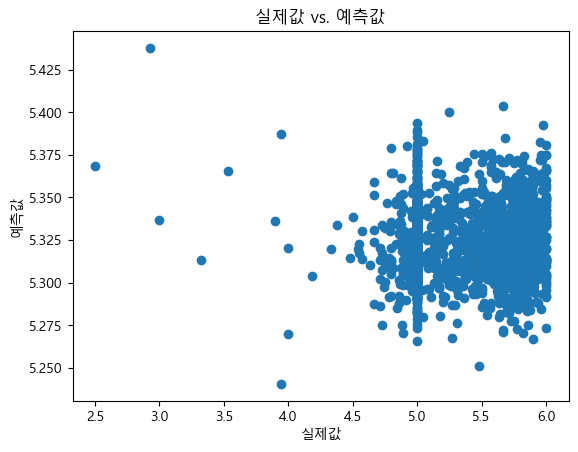

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs. 예측값')
plt.show()

In [23]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

0.6085605682317413

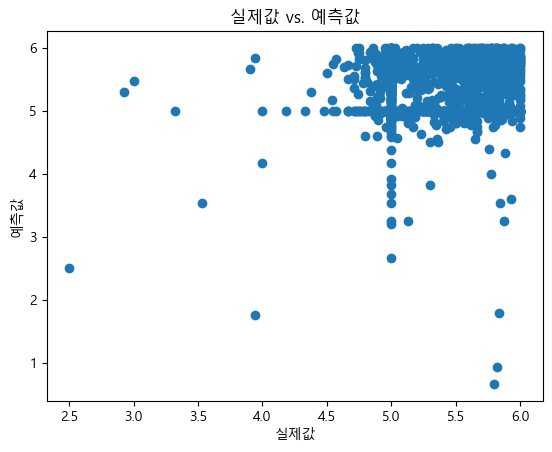

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs. 예측값')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.4219297044895023

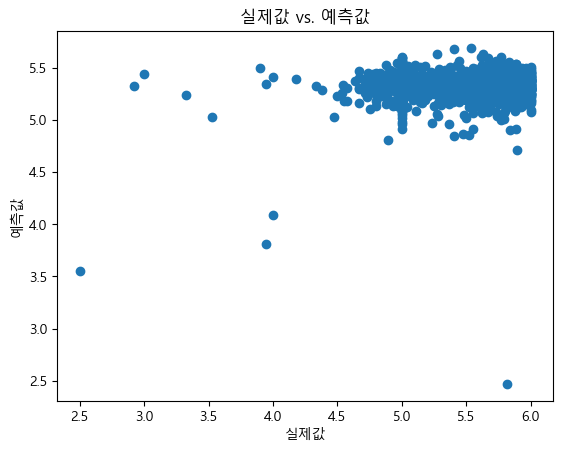

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs. 예측값')
plt.show()

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_rmse

0.4233512765375411

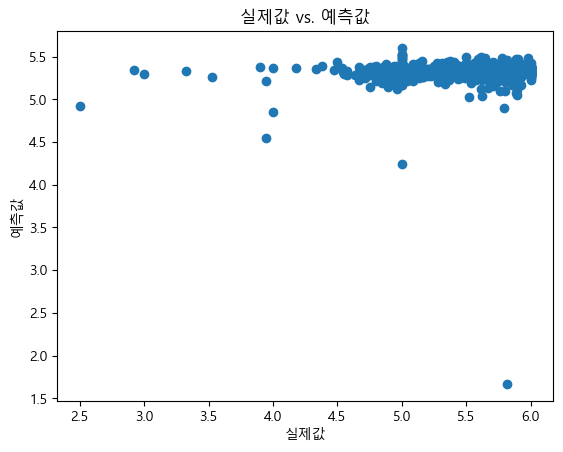

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs. 예측값')
plt.show()